In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# TEMPORAL DIFFERENCE LEARNING

In [12]:
State= np.array(['T1','A','B','C','D','E','T2'])

vpi_1=np.array([0,0.5,0.5,0.5,0.5,0.5,0]) #Initialise v(s) for all states. alpha=0.05
vpi_2=np.array([0,0.5,0.5,0.5,0.5,0.5,0]) #Initialise v(s) for all states. alpha=0.10
vpi_3=np.array([0,0.5,0.5,0.5,0.5,0.5,0]) #Initialise v(s) for all states. alpha=0.15

vfe_1=[] #Store v(s) after every episode to plot the left figure in the example.
vfe_2=[]
vfe_3=[]



EPISODES=[] #Make an empty array to store all the episodes generated.

for episodes in range(100): #Run for 100 episodes x 100 runs
    state= 3 #Start in 'C'
    episode=[] #An empty list to keep the record of the current episode.
    

    while(0<state<6):#Loop till you don't reach Terminal States
        
        episode.append(State[state]) #append the state in the episode list
        action= np.random.choice([-1,1], p=[0.5,0.5]) #Equi probable option of picking left or right
        
        next_state= state + action #If left then go to previous index (curr-1), if right go to the next (curr+1)
        
        vpiss_1=0 #Initialise state value of the next state
        vpiss_2=0 #Initialise state value of the next state
        vpiss_3=0 #Initialise state value of the next state
        
        if(next_state==6):
            reward=1
            vpiss_1=0  #State Value of Terminal State will always be zero
            vpiss_2=0
            vpiss_3=0
            
        elif(next_state==0):
            reward=0
            vpiss_1=0  #State Value of Terminal State will always be zero
            vpiss_2=0
            vpiss_3=0
            
        else:
            reward=0
            vpiss_1= vpi_1[next_state] #Put the estimated state value of the next state in vpiss variable.
            vpiss_2= vpi_2[next_state]
            vpiss_3= vpi_3[next_state]
            
            
        #Use TD definition to get the estimate of the current state, with alpha =0.1
        # V(s)= V(s) + alpha( gama*V(s') + reward - V(s) )
        vpi_1[state]= vpi_1[state]+ 0.05*(reward + vpiss_1 - vpi_1[state])
        vpi_2[state]= vpi_2[state]+ 0.1*(reward + vpiss_2 - vpi_2[state])
        vpi_3[state]= vpi_3[state]+ 0.15*(reward + vpiss_3- vpi_3[state])
        
        #Now our current state, can be the next state; as we are done for 't'
        state= next_state
        
        #Append the reward in the episode list
        episode.append(reward) 
 
        
  
    temp_1=vpi_1.copy()
    temp_2=vpi_2.copy()
    temp_3=vpi_3.copy()
    
    
    vfe_1.append(temp_1)
    vfe_2.append(temp_2)
    vfe_3.append(temp_3)
    
    EPISODES.append(episode)


# EXAMPLE 6.2, LEFT FIGURE

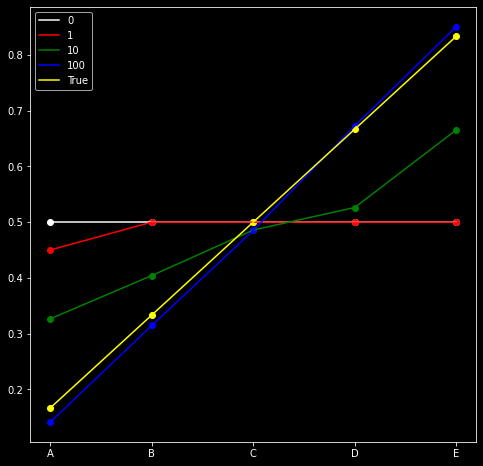

In [13]:
plt.figure(0, figsize=(8,8))
plt.style.use('dark_background')


plt.plot([1,2,3,4,5], [0.5,0.5,0.5,0.5,0.5], color='white', label='0')
plt.scatter([1,2,3,4,5] , [0.5,0.5,0.5,0.5,0.5], color='white')

plt.plot([1,2,3,4,5],vfe_2[0][1:-1], color='red', label='1')
plt.scatter([1,2,3,4,5] , vfe_2[0][1:-1], color='red')


plt.plot([1,2,3,4,5],vfe_2[9][1:-1], color='green', label='10')
plt.scatter([1,2,3,4,5] , vfe_2[9][1:-1], color='green')

plt.plot([1,2,3,4,5],vfe_2[99][1:-1], color='blue', label='100')
plt.scatter([1,2,3,4,5] , vfe_2[99][1:-1], color='blue')

plt.plot([1,2,3,4,5], [1/6,2/6,3/6,4/6,5/6], color='Yellow',label='True')
plt.scatter([1,2,3,4,5] ,[1/6,2/6,3/6,4/6,5/6] , color='Yellow')


plt.legend()
plt.xticks([1,2,3,4,5],State[1:-1])
plt.show()

### EXERCISE 6.3)

From the results shown in the left graph of the random walk example it
appears that the first episode results in a change in only V (A). What does this tell you
about what happened on the first episode? Why was only the estimate for this one state
changed? By exactly how much was it changed?

ANS) The first episode can only change the state value for 'A' or 'E'. This is because as per the update rule:
v(s)= v(s) + a(v(s')+r-v(s)), for all states other than terminal states v(s) is 1/2. This means V(s') and V(s) cancel with each other inside the alpha bracket. V(s)= V(s) + ar is left. Since, all rewards in the middle are zero ==> v(s)= v(s) and there is no change for the middle states.

However, for 'A' and 'E', this cancelation won't take place if s' is 'T1' or 'T2'; because the value of terminal states is zero. Since, in episode 1 the value of state 'A' changed this means that in episode 1, we reached state 'A' and Terminated on the left 'T1'.
V(A)= V(A) + a(0 + V(T1) - V(A))
V(A)= 0.5 + a(0) + a(0) - a(1/2)

V(A)= 0.5 - a(1/2)
v(A)= 0.5- a/2

and hence, the value of state A went down in the first episode.
The value of state 'A' reduced by a/2. Where a is alpha parameter. For alpha=0.1... reduction is 0.05
Hence, the new value os state 'A' is 0.45.

### EXERCISE 6.4)

The specific results shown in the right graph of the random walk example
are dependent on the value of the step-size parameter, ↵. Do you think the conclusions
about which algorithm is better would be a↵ected if a wider range of ↵ values were used?
Is there a di↵erent, fixed value of ↵ at which either algorithm would have performed
significantly better than shown? Why or why not?

ANS)
No, there cannot be any special a for which one method would perform. First of all alpha must be small for convergence to occur in both Monte carlo and TD. So, we cannot use a very wide range, we would still want alpha to be sufficiently small to ensure convergence. Moreover in all the graphs shown, the learning curve has saturated in every case of alpha, so there cannot be any meaningful conclusion drawn from taking some other alphas. However, having alpha dependent on time or the states might be a better option and help in better estimates.

### EXERCISE 6.5)

In the right graph of the random walk example, the RMS error of the
TD method seems to go down and then up again, particularly at high ↵’s. What could
have caused this? Do you think this always occurs, or might it be a function of how the
approximate value function was initialized?

ANS) Taking larger steps in higher alphas in case of TD method is turning out to rise the errors later in the state. Maybe since, we initialised every state value to the same numerical number, this results in cancelling out of v[s] and v[s’] a lot of times. However, later in the episode this cancellation would not occur and we might make our estimates of current states noisy due to noise of other states. Since, state ‘C’ is initialized to its actual True value, it will move away from it and hence RMSE would increase.